In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
with open("facebook-wall.txt", "r") as file:
    data = np.array([[int(s) for s in line.split("\t")] for line in file.readlines()])

nodes = np.unique(data[:, :2])

In [3]:
graph = nx.DiGraph()
for i in nodes:
    graph.add_node(i)
for i, j in data[data[:, 0] != data[:, 1]][:, :2]:
    graph.add_edge(i, j)

In [14]:
in_degrees = np.zeros(max(nodes) + 1, dtype=int)
out_degrees = in_degrees.copy()
for i, j in data[:, :2]:
    out_degrees[i] += 1
    in_degrees[j] += 1
in_degrees, out_degrees = in_degrees[nodes], out_degrees[nodes]

In [28]:
degrees = np.unique([in_degrees, out_degrees])
in_counts = np.zeros(max(degrees) + 1, dtype=int)
for deg in in_degrees:
    in_counts[deg] += 1
out_counts = in_counts.copy()
for deg in out_degrees:
    out_counts[deg] += 1
in_counts, out_counts = in_counts[degrees], out_counts[degrees]

in_ccdf = np.cumsum(in_counts, dtype=float) / sum(in_counts)
out_ccdf = np.cumsum(out_counts, dtype=float) / sum(out_counts)

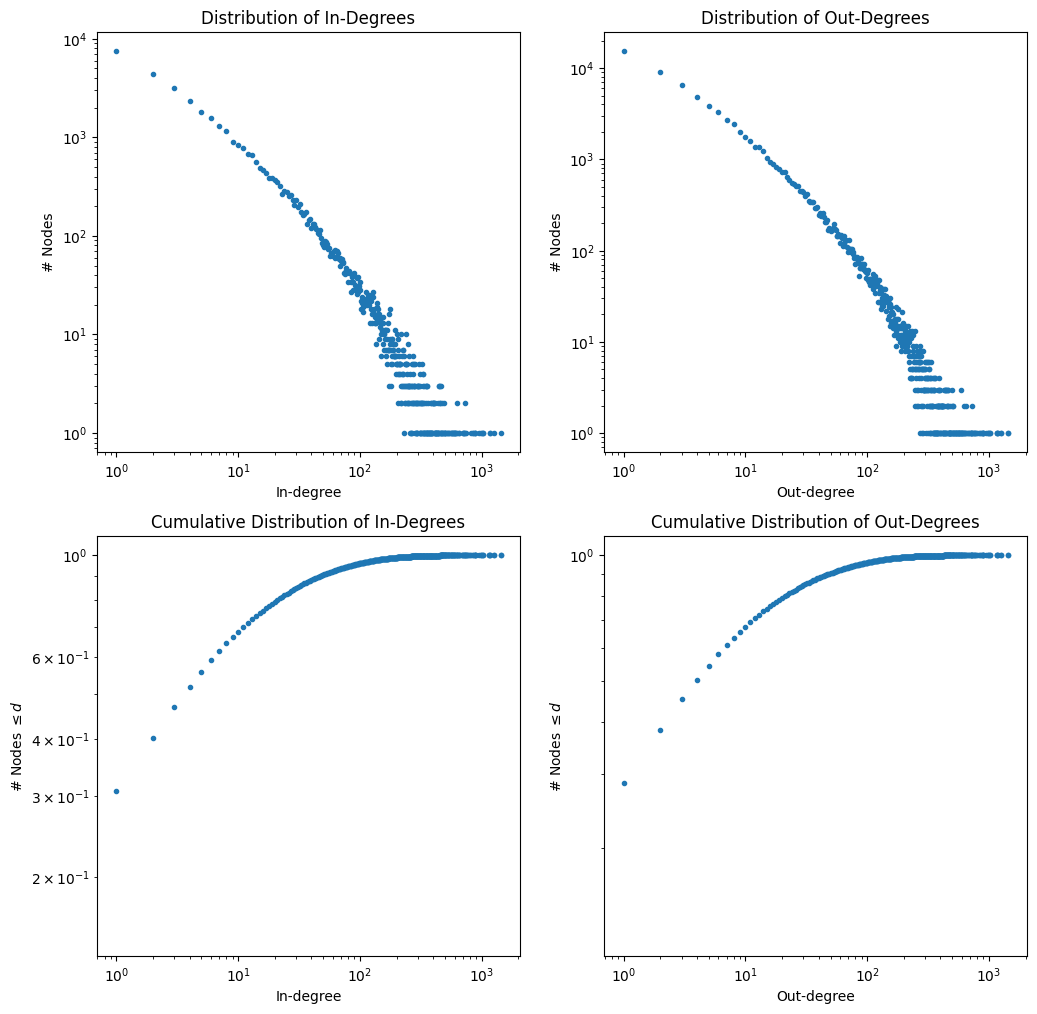

In [33]:
fig, ((ax_in, ax_out), (ax_in_ccdf, ax_out_ccdf)) = plt.subplots(2, 2)
fig.set_figwidth(12)
fig.set_figheight(12)
for ax, data, what in [(ax_in, in_counts, "In"), (ax_out, out_counts, "Out")]:
    ax.set_title(f"Distribution of {what}-Degrees")
    ax.set_xlabel(f"{what}-degree")
    ax.set_ylabel(f"# Nodes")
    ax.loglog(degrees, data, marker=".", linestyle="")
for ax, data, what in [(ax_in_ccdf, in_ccdf, "In"), (ax_out_ccdf, out_ccdf, "Out")]:
    ax.set_title(f"Cumulative Distribution of {what}-Degrees")
    ax.set_xlabel(f"{what}-degree")
    ax.set_ylabel(rf"# Nodes $\leq d$")
    ax.loglog(degrees, data, marker=".", linestyle="")
plt.show()

In [4]:
nx.draw(graph)

: 